### Algorithm (vendatu-shukla) to create a superposition of uniform states of any M distict states. 
$$\left| \psi \right\rangle = \frac{1}{\sqrt{M}} \sum_{j = 0}^k \left| j \right\rangle$$

Where $M < 2^n$ and $M \neq 2^r$ where $r \in \mathbb{N}$ and $r \leq n-1$ 



In [158]:
import numpy as np

from qiskit import QuantumCircuit, QuantumRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer


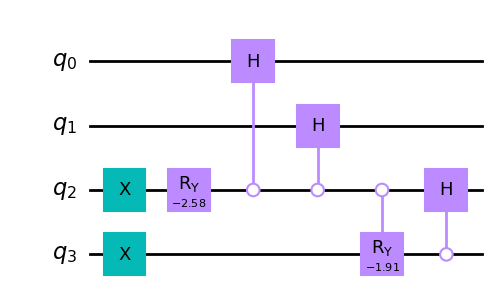

In [159]:
# an example for creating M = 13 superposed states
M = 13
l0, l1, l2 = 0, 2, 3
M0 = 1
qc = QuantumCircuit(4)
theta0 = -2*np.acos(np.sqrt(M0 / M))
theta1 = -2*np.acos(np.sqrt(2**l1 / (M - M0) ))

qc.x(2)
qc.x(3)
qc.ry(theta0, 2)
qc.ch(2, 0, ctrl_state='0')
qc.ch(2, 1, ctrl_state='0')
qc.cry(theta1, 2, 3,ctrl_state='0')
qc.ch(3, 2, ctrl_state='0')

qc.draw('mpl', style='clifford')

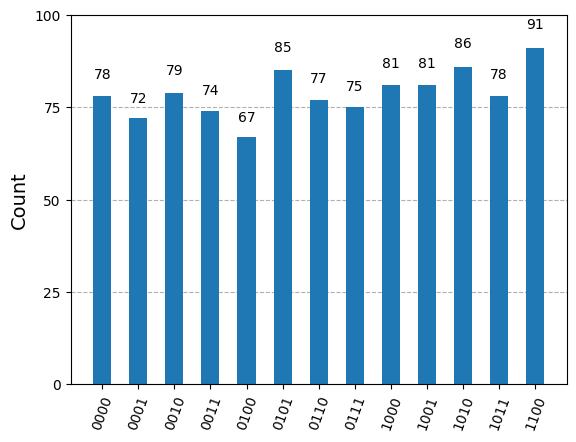

In [160]:
qc.measure_all()

sim = Aer.get_backend('aer_simulator')
transpiled_qc = transpile(qc, sim)
result = sim.run(transpiled_qc).result()
counts = result.get_counts()

plot_histogram(counts)

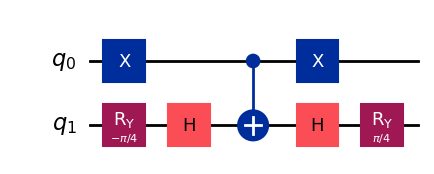

In [161]:
# and example of how to create a controlled hadamard gate with simple set of universal gates(CNOT, RY, H)

controlled_hadamard = QuantumCircuit(2)

controlled_hadamard.ry(-np.pi/4, 1)
controlled_hadamard.x(0)
controlled_hadamard.h(1)
controlled_hadamard.cx(0, 1)
controlled_hadamard.x(0)
controlled_hadamard.h(1)
controlled_hadamard.ry(np.pi/4, 1)

controlled_hadamard.draw('mpl')

In [162]:
state = Statevector(controlled_hadamard)
state.draw('latex')

<IPython.core.display.Latex object>

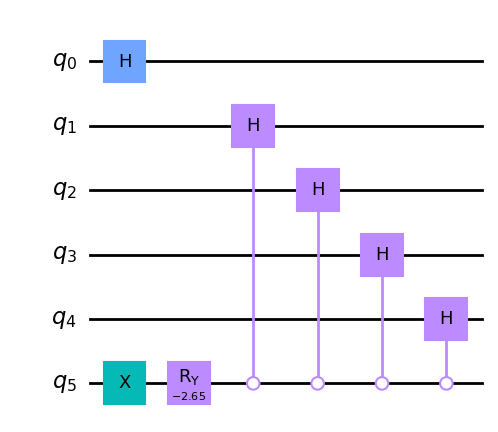

In [184]:
# generalized uniform function which takes the M input and outputs the quantum state
# with only ceil(log_2 M) gates and without any additional ancilla gates.
M = 34
def qUniform(M):

    n = int(np.ceil(np.log2(M)))


    B = [int(x) for x in list(np.binary_repr(M))[::-1]]
    k = len(B)
    L = [i for i, b in enumerate(B) if b == 1]
    M0 = 2**(L[0])
    theta = -2*np.arccos(np.sqrt(M0/M))
    
    qreg = QuantumRegister(n, name='q')
    quniform = QuantumCircuit(qreg)

    quniform.x( qreg[L[1:k]] )


    if L[0] > 0:
        quniform.h(qreg[ 0 : L[0]])

    quniform.ry(theta, qreg[L[1]])
    quniform.ch(L[1], qreg[L[0]: L[1]] ,  ctrl_state=0)

    for i in range(1, len(L) - 1):
        # Mm = np.sum([2**x for x in L[i:i+1]])

        mtheta = -2 * np.arccos(np.sqrt(2**L[i] / (M - M0 ) ))

        quniform.cry(mtheta, qreg[L[i]], qreg[L[i+1]], ctrl_state= '0')
        quniform.ch(qreg[ L[i+1] ], qreg[L[i]: L[i+1]] , ctrl_state='0')
        M0 += 2**(L[i])
    return quniform

quc= qUniform(M)
quc.draw('mpl', style='Clifford')


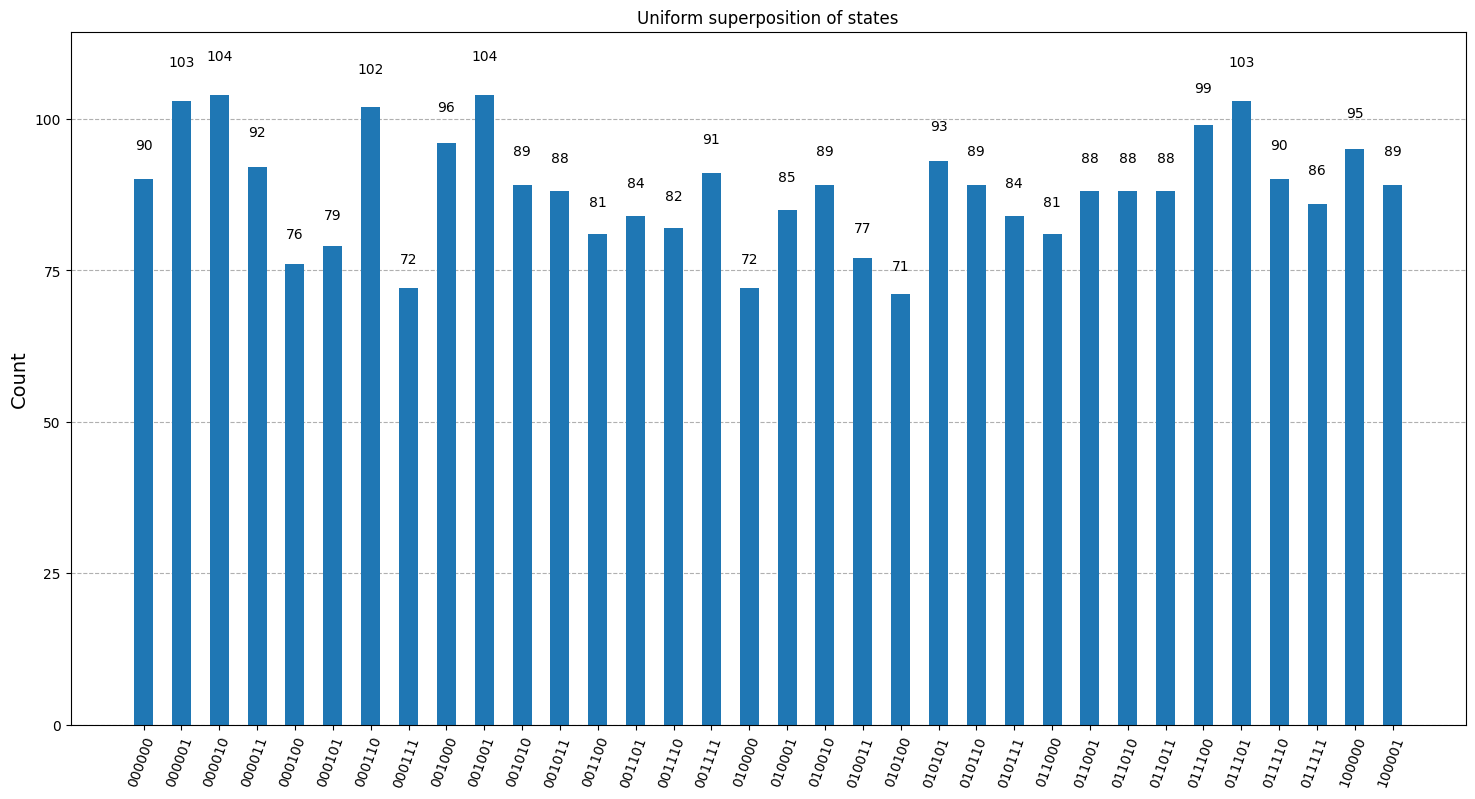

In [185]:
quc.measure_all()

sim = Aer.get_backend('aer_simulator')
transpiled_qc = transpile(quc, sim)
result = sim.run(transpiled_qc, shots = 3000).result()
counts = result.get_counts()

plot_histogram(counts, figsize=(18 ,9), title='Uniform superposition of states')
